Imports

In [46]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

Adatok betöltése, tisztitása

In [47]:
file_path = "Cseh hírlappiac adattábla.xlsx"
excel_data = pd.ExcelFile(file_path)

df_forgalom = excel_data.parse('Forgalom')
df_bolttorzs = excel_data.parse('Bolttörzs')
df_koltsegek = excel_data.parse('Költségek')
display(df_forgalom.head())
display(df_forgalom.describe())
display(df_forgalom.dtypes)
display(df_bolttorzs.head())
display(df_bolttorzs.describe())
display(df_bolttorzs.dtypes)
display(df_koltsegek.head())
display(df_koltsegek.describe())
display(df_koltsegek.dtypes)

,Bolt név,Év,Hó,Termékkategória,GM
0,1,2016,1,Díjbefizetés,"6,877.78"
1,1,2016,1,"Élelmiszer, dohány és egyéb","44,202.48"
2,1,2016,1,Hírlap,"42,777.05"
3,1,2016,1,Sazka,"1,069.26"
4,1,2016,2,Díjbefizetés,"6,866.67"


,Bolt név,Év,Hó,GM
count,"17,965.00","17,965.00","17,965.00","17,965.00"
mean,76.54,"2,016.50",6.50,"35,359.63"
std,43.91,0.50,3.45,"47,151.91"
min,1.00,"2,016.00",1.00,"-30,194.35"
25%,38.00,"2,016.00",3.00,"4,303.70"
50%,77.00,"2,016.00",6.00,"19,752.06"
75%,115.00,"2,017.00",9.00,"46,724.22"
max,152.00,"2,017.00",12.00,"554,025.32"


Bolt név             int64
Év                   int64
Hó                   int64
Termékkategória     object
GM                 float64
dtype: object

,Boltnév,Lokacio,Prága,Alapterület,Heti nyitva tartás,Vasárnapi nyitva tartás,Árkategória,Lottóterminál,PUDO terminál,Létszám,Autók száma,Iskolazottsag,Ingatlan ár / nm,Építési engedélyek száma,Internet előfizetők száma,Álláskeresők száma,SZJA / fő,Születések száma,Lakosok száma,0_50m_atl,50_100m_atl,100_pluszm_atl,Hirlap_regal_db,Hirlap_kivul_regal_db
0,1.00,Bevásárló központ,1,12.71,81.00,9.00,8,0,0,2.00,32774,18712,"24,000.01",125,886683,1989,90.98,1027,50374,"791,575.32",0.00,"3,365,232.07",11.42,0.87
1,2.00,Fő utca,0,66.00,61.00,0.00,8,1,1,2.00,13608,5240,"17,303.75",56,10231,918,86.63,361,17845,0.00,0.00,"473,920.63",20.26,1.21
2,3.00,Albert,0,35.09,64.00,8.00,8,1,1,3.00,7904,2600,"12,025.23",4,7797,800,89.59,264,11339,"1,495,502.25",0.00,"755,665.75",11.55,0.55
3,4.00,Albert,0,34.24,80.00,9.00,8,1,1,0.00,7268,2760,"287,859.20",12,6045,1095,68.16,217,10950,"2,621,098.30",0.00,"407,519.30",8.80,2.20
4,5.00,Fő utca,0,30.00,72.00,4.00,7,1,1,3.00,3557,940,"6,598.36",0,2896,976,63.59,99,6098,0.00,0.00,"973,051.74",9.81,0.22


,Boltnév,Prága,Alapterület,Heti nyitva tartás,Vasárnapi nyitva tartás,Árkategória,Lottóterminál,PUDO terminál,Létszám,Autók száma,Iskolazottsag,Ingatlan ár / nm,Építési engedélyek száma,Internet előfizetők száma,Álláskeresők száma,SZJA / fő,Születések száma,Lakosok száma,0_50m_atl,50_100m_atl,100_pluszm_atl,Hirlap_regal_db,Hirlap_kivul_regal_db
count,152.00,153.00,153.00,153.00,143.00,153.00,153.00,153.00,153.00,153.00,153.00,152.00,153.00,153.00,153.00,153.00,153.00,153.00,151.00,151.00,151.00,151.00,151.00
mean,76.50,0.16,38.56,72.29,5.73,7.88,0.55,0.88,2.44,"30,290.39","19,099.21","40,521.08",166.45,"167,994.89","2,549.53",91.95,821.92,"43,301.93","1,965,034.00","263,421.58","915,025.14",13.32,2.77
std,44.02,0.37,19.67,10.77,4.25,0.60,0.50,0.32,1.31,"24,154.64","18,576.32","155,792.31",209.97,"319,581.90","2,819.36",18.51,699.01,"36,665.88","3,298,479.40","681,866.90","949,624.51",3.87,2.47
min,1.00,0.00,4.80,41.00,0.00,7.00,0.00,0.00,0.00,"1,489.00",293.00,"5,043.25",0.00,"1,165.00",140.00,41.90,68.00,"2,942.00",0.00,0.00,0.00,5.50,0.00
25%,38.75,0.00,23.16,65.50,0.00,8.00,0.00,1.00,2.00,"9,143.00","3,654.00","12,128.99",12.00,"7,797.00",753.00,78.55,250.00,"11,311.00",0.00,0.00,"88,537.87",11.00,0.98
50%,76.50,0.00,35.76,73.00,7.00,8.00,1.00,1.00,2.00,"24,820.00","12,812.00","18,020.92",81.00,"24,324.00","1,557.00",89.84,632.00,"33,827.00","344,114.02",0.00,"692,690.02",12.83,1.95
75%,114.25,0.00,49.07,80.00,9.00,8.00,1.00,1.00,3.00,"51,488.00","30,767.00","24,000.01",257.00,"75,780.00","2,519.00",100.01,"1,498.00","65,438.00","2,675,427.63",0.00,"1,290,795.51",15.40,3.65
max,152.00,1.00,117.60,102.00,14.00,9.00,1.00,1.00,6.00,"83,845.00","66,625.00","1,365,382.23",849.00,"886,683.00","11,437.00",146.96,"2,564.00","124,543.00","15,814,256.74","3,384,148.80","5,069,837.50",30.98,13.20


Boltnév                      float64
Lokacio                       object
Prága                          int64
Alapterület                  float64
Heti nyitva tartás           float64
Vasárnapi nyitva tartás      float64
Árkategória                    int64
Lottóterminál                  int64
PUDO terminál                  int64
Létszám                      float64
Autók száma                    int64
Iskolazottsag                  int64
Ingatlan ár / nm             float64
Építési engedélyek száma       int64
Internet előfizetők száma      int64
Álláskeresők száma             int64
SZJA / fő                    float64
Születések száma               int64
Lakosok száma                  int64
0_50m_atl                    float64
50_100m_atl                  float64
100_pluszm_atl               float64
Hirlap_regal_db              float64
Hirlap_kivul_regal_db        float64
dtype: object

,Boltnév,Év,Költségek
0,1.00,2016,"-794,348.89"
1,1.00,2017,"-819,537.78"
2,2.00,2016,"-934,127.78"
3,2.00,2017,"-947,942.04"
4,3.00,2016,"-546,540.93"


,Boltnév,Év,Költségek
count,304.00,306.00,306.00
mean,76.50,"2,016.50","-783,206.77"
std,43.95,0.50,"568,062.22"
min,1.00,"2,016.00","-3,515,973.15"
25%,38.75,"2,016.00","-946,140.37"
50%,76.50,"2,016.50","-625,905.93"
75%,114.25,"2,017.00","-398,689.58"
max,152.00,"2,017.00","40,678.89"


Boltnév      float64
Év             int64
Költségek    float64
dtype: object

Költség tisztítása

In [48]:
remaining_columns = df_forgalom.isna().sum()
display(remaining_columns)

numerical_cols = df_forgalom.select_dtypes(include=['float64', 'int64']).columns
non_numerical_cols = df_forgalom.select_dtypes(exclude=['float64', 'int64']).columns

for col in numerical_cols:
    if df_forgalom[col].isna().sum() > 0:
        df_forgalom[col] = df_forgalom[col].fillna(df_forgalom[col].mean())

for col in non_numerical_cols:
    if df_forgalom[col].isna().sum() > 0:
        df_forgalom[col] = df_forgalom[col].fillna("N/A")

remaining_columns = df_forgalom.isna().sum() 
display(remaining_columns)

Bolt név           0
Év                 0
Hó                 0
Termékkategória    0
GM                 0
dtype: int64

Bolt név           0
Év                 0
Hó                 0
Termékkategória    0
GM                 0
dtype: int64

Bolttörzs tisztítása

In [49]:
remaining_columns = df_bolttorzs.isna().sum()
display(remaining_columns)

numerical_cols = df_bolttorzs.select_dtypes(include=['float64', 'int64']).columns
non_numerical_cols = df_bolttorzs.select_dtypes(exclude=['float64', 'int64']).columns


for col in numerical_cols:
    if df_bolttorzs[col].isna().sum() > 0:
        df_bolttorzs[col] = df_bolttorzs[col].fillna(df_bolttorzs[col].mean())


for col in non_numerical_cols:
    if df_bolttorzs[col].isna().sum() > 0:
        df_bolttorzs[col] = df_bolttorzs[col].fillna("N/A")

remaining_columns = df_bolttorzs.isna().sum() 
display(remaining_columns)


Boltnév                       1
Lokacio                       0
Prága                         0
Alapterület                   0
Heti nyitva tartás            0
Vasárnapi nyitva tartás      10
Árkategória                   0
Lottóterminál                 0
PUDO terminál                 0
Létszám                       0
Autók száma                   0
Iskolazottsag                 0
Ingatlan ár / nm              1
Építési engedélyek száma      0
Internet előfizetők száma     0
Álláskeresők száma            0
SZJA / fő                     0
Születések száma              0
Lakosok száma                 0
0_50m_atl                     2
50_100m_atl                   2
100_pluszm_atl                2
Hirlap_regal_db               2
Hirlap_kivul_regal_db         2
dtype: int64

Boltnév                      0
Lokacio                      0
Prága                        0
Alapterület                  0
Heti nyitva tartás           0
Vasárnapi nyitva tartás      0
Árkategória                  0
Lottóterminál                0
PUDO terminál                0
Létszám                      0
Autók száma                  0
Iskolazottsag                0
Ingatlan ár / nm             0
Építési engedélyek száma     0
Internet előfizetők száma    0
Álláskeresők száma           0
SZJA / fő                    0
Születések száma             0
Lakosok száma                0
0_50m_atl                    0
50_100m_atl                  0
100_pluszm_atl               0
Hirlap_regal_db              0
Hirlap_kivul_regal_db        0
dtype: int64

Forgalom tisztítása

In [50]:
remaining_columns = df_koltsegek.isna().sum() 
display(remaining_columns)

numerical_cols = df_koltsegek.select_dtypes(include=['float64', 'int64']).columns
non_numerical_cols = df_koltsegek.select_dtypes(exclude=['float64', 'int64']).columns

for col in numerical_cols:
    if df_koltsegek[col].isna().sum() > 0:
        df_koltsegek[col] = df_koltsegek[col].fillna(df_koltsegek[col].mean())

for col in non_numerical_cols:
    if df_koltsegek[col].isna().sum() > 0:
        df_koltsegek[col] = df_koltsegek[col].fillna("N/A")

        
remaining_columns = df_koltsegek.isna().sum() 
display(remaining_columns)


Boltnév      2
Év           0
Költségek    0
dtype: int64

Boltnév      0
Év           0
Költségek    0
dtype: int64

Duplikált sorok törlése

In [51]:
duplikalt_boltok = df_bolttorzs[df_bolttorzs.duplicated()]
duplikalt_koltsegek = df_koltsegek[df_koltsegek.duplicated]
duplikalt_forgalom = df_forgalom[df_forgalom.duplicated()]


df_bolttorzs = df_bolttorzs.drop_duplicates()
df_koltsegek = df_koltsegek.drop_duplicates()
df_forgalom = df_forgalom.drop_duplicates()

Azokat a mezőket amik érvénytelen értéket vesznek fel az átlagra cseréljük

In [52]:
oszlopok_check = [
    'Alapterület', 'Létszám', 'Hirlap_regal_db', 'Hirlap_kivul_regal_db'
]

for col in oszlopok_check:
    mask = df_bolttorzs[col] <= 0
    if mask.any():
        avg_val = df_bolttorzs.loc[~mask, col].mean()
        df_bolttorzs.loc[mask, col] = avg_val

In [53]:
df_forgalom.rename(columns={'Bolt név': 'Boltnév'}, inplace=True)

Aggregálás és korrelációt mátrxi számítása a profitra

In [54]:
df_gm_ev = (
    df_forgalom.groupby(['Boltnév', 'Év'])['GM'].sum().reset_index()
    )


df_profit_ev = pd.merge(df_gm_ev, df_koltsegek, on=['Boltnév', 'Év'], how='left')
df_profit_ev['Profit'] = df_profit_ev['GM'] + df_profit_ev['Költségek']


df_teljes = pd.merge(df_profit_ev, df_bolttorzs, on='Boltnév', how='left')

df_teljes = df_teljes.sort_values(by=['Profit'], ascending=False).reset_index(drop=True)

df_bolt = (
    df_teljes.groupby('Boltnév')['Profit']
    .agg(Atlag_Profit='mean', Min_Profit='min', Max_Profit='max')
    .reset_index()
    .sort_values(by='Atlag_Profit', ascending=False)
)

top5_boltok = df_bolt.head(5)['Boltnév']
df_top = df_teljes[df_teljes['Boltnév'].isin(top5_boltok)]
display(df_top)

bottom5_boltok = df_bolt.tail(5)['Boltnév']
df_bottom = df_teljes[df_teljes['Boltnév'].isin(bottom5_boltok)]
display(df_bottom)                          

# display(df_teljes.head(10))
# display(df_teljes.tail(10))

pd.set_option('display.max_columns', None)

C:\Users\Boldizsár Nagy\AppData\Local\Temp\ipykernel_16548\166994988.py:6: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  df_profit_ev = pd.merge(df_gm_ev, df_koltsegek, on=['Boltnév', 'Év'], how='left')
C:\Users\Boldizsár Nagy\AppData\Local\Temp\ipykernel_16548\166994988.py:10: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  df_teljes = pd.merge(df_profit_ev, df_bolttorzs, on='Boltnév', how='left')


,Boltnév,Év,GM,Költségek,Profit,Lokacio,Prága,Alapterület,Heti nyitva tartás,Vasárnapi nyitva tartás,Árkategória,Lottóterminál,PUDO terminál,Létszám,Autók száma,Iskolazottsag,Ingatlan ár / nm,Építési engedélyek száma,Internet előfizetők száma,Álláskeresők száma,SZJA / fő,Születések száma,Lakosok száma,0_50m_atl,50_100m_atl,100_pluszm_atl,Hirlap_regal_db,Hirlap_kivul_regal_db
0,72,2016,"8,980,843.61","-2,547,261.48","6,433,582.13",Bevásárló központ,1,18.00,84.00,9.00,9,1,0,4.00,29588,35251,"40,344.14",91,886683,571,146.96,761,43590,"6,037,977.82",0.00,"1,435,828.85",13.21,0.87
1,72,2017,"9,229,111.61","-2,831,084.44","6,398,027.16",Bevásárló központ,1,18.00,84.00,9.00,9,1,0,4.00,29588,35251,"40,344.14",91,886683,571,146.96,761,43590,"6,037,977.82",0.00,"1,435,828.85",13.21,0.87
2,24,2017,"9,415,994.10","-3,395,291.11","6,020,702.99",Bevásárló központ,1,32.40,82.00,10.00,9,1,0,4.00,69306,66625,"1,365,382.23",597,886683,1910,127.55,2083,102324,"10,610,527.72",0.00,"1,839,389.65",13.11,2.17
3,24,2016,"8,555,617.47","-3,515,973.15","5,039,644.32",Bevásárló központ,1,32.40,82.00,10.00,9,1,0,4.00,69306,66625,"1,365,382.23",597,886683,1910,127.55,2083,102324,"10,610,527.72",0.00,"1,839,389.65",13.11,2.17
4,61,2016,"5,860,163.12","-1,073,795.37","4,786,367.75",Fő utca,1,62.40,82.00,10.00,9,1,1,4.00,19395,12723,"83,353.67",42,886683,442,110.65,256,25658,0.00,0.00,"2,203,620.04",26.58,3.09
5,61,2017,"5,409,476.41","-1,202,559.63","4,206,916.79",Fő utca,1,62.40,82.00,10.00,9,1,1,4.00,19395,12723,"83,353.67",42,886683,442,110.65,256,25658,0.00,0.00,"2,203,620.04",26.58,3.09
6,7,2017,"5,547,902.39","-1,651,507.04","3,896,395.36",Kaufland,0,60.94,102.00,12.00,8,1,1,5.00,17610,9640,"27,667.73",95,12319,668,127.16,330,14213,"14,886,084.83",0.00,0.00,16.50,2.75
7,22,2017,"5,120,198.02","-1,708,349.63","3,411,848.39",Kaufland,0,95.40,93.00,12.00,8,1,1,2.81,5469,1860,"16,477.17",56,4450,298,97.53,166,5788,"8,731,799.53",0.00,0.00,20.90,8.80
9,7,2016,"4,989,120.50","-1,706,600.19","3,282,520.31",Kaufland,0,60.94,102.00,12.00,8,1,1,5.00,17610,9640,"27,667.73",95,12319,668,127.16,330,14213,"14,886,084.83",0.00,0.00,16.50,2.75
19,22,2016,"4,447,641.86","-1,593,377.96","2,854,263.90",Kaufland,0,95.40,93.00,12.00,8,1,1,2.81,5469,1860,"16,477.17",56,4450,298,97.53,166,5788,"8,731,799.53",0.00,0.00,20.90,8.80


,Boltnév,Év,GM,Költségek,Profit,Lokacio,Prága,Alapterület,Heti nyitva tartás,Vasárnapi nyitva tartás,Árkategória,Lottóterminál,PUDO terminál,Létszám,Autók száma,Iskolazottsag,Ingatlan ár / nm,Építési engedélyek száma,Internet előfizetők száma,Álláskeresők száma,SZJA / fő,Születések száma,Lakosok száma,0_50m_atl,50_100m_atl,100_pluszm_atl,Hirlap_regal_db,Hirlap_kivul_regal_db
284,76,2017,"791,713.38","-526,981.85","264,731.53",Albert,0,22.92,76.00,10.00,8,0,1,3.00,33258,13731,"20,819.82",156,23209,1304,98.98,818,31580,"2,729,756.96",0.00,"344,504.09",10.45,3.30
292,81,2017,"842,170.15","-654,425.19","187,744.96",Albert,0,35.40,77.00,11.00,8,0,1,2.81,15955,8598,"14,761.48",22,13720,1229,98.17,346,19781,"5,376,379.61",0.00,"1,000,197.58",13.20,4.95
293,135,2017,"750,705.07","-565,820.19","184,884.88",Albert,0,39.60,68.00,8.00,8,0,1,2.81,12091,4376,"11,746.85",49,9218,1399,70.05,322,16444,"2,886,286.59",0.00,"520,415.52",15.40,1.65
294,33,2017,"734,755.83","-558,222.22","176,533.61",Kaufland,0,42.00,74.00,8.00,8,0,1,4.00,63760,47516,"15,049.59",385,75780,5537,87.82,1695,104913,"3,179,997.02",0.00,0.00,12.10,5.50
295,81,2016,"799,189.63","-635,126.48","164,063.15",Albert,0,35.40,77.00,11.00,8,0,1,2.81,15955,8598,"14,761.48",22,13720,1229,98.17,346,19781,"5,376,379.61",0.00,"1,000,197.58",13.20,4.95
296,33,2016,"691,056.12","-530,463.15","160,592.97",Kaufland,0,42.00,74.00,8.00,8,0,1,4.00,63760,47516,"15,049.59",385,75780,5537,87.82,1695,104913,"3,179,997.02",0.00,0.00,12.10,5.50
299,76,2016,"668,161.82","-526,467.96","141,693.86",Albert,0,22.92,76.00,10.00,8,0,1,3.00,33258,13731,"20,819.82",156,23209,1304,98.98,818,31580,"2,729,756.96",0.00,"344,504.09",10.45,3.30
300,127,2017,"580,579.10","-447,837.78","132,741.33",Albert,0,21.76,83.00,11.00,8,0,1,3.00,28477,18564,"13,948.88",208,28192,3751,99.33,801,45089,"1,596,730.94",0.00,"1,065,351.08",12.65,1.65
302,135,2016,"688,805.59","-589,424.07","99,381.52",Albert,0,39.60,68.00,8.00,8,0,1,2.81,12091,4376,"11,746.85",49,9218,1399,70.05,322,16444,"2,886,286.59",0.00,"520,415.52",15.40,1.65
303,127,2016,"507,312.41","-436,735.56","70,576.86",Albert,0,21.76,83.00,11.00,8,0,1,3.00,28477,18564,"13,948.88",208,28192,3751,99.33,801,45089,"1,596,730.94",0.00,"1,065,351.08",12.65,1.65


In [55]:
# df_korrel = df_teljes.corr(numeric_only=True)

# df_szurt = df_korrel[(df_korrel.abs() > 0.2)]
# df_szurt = df_szurt['Profit'].dropna().drop(labels=['Profit', 'GM', 'Költségek'])
# importatant_cols = df_szurt.index
# display(importatant_cols)

Boltok potenciáljának vizsgálata linreggel

In [56]:
# df_regresszio = df_teljes.dropna(subset=importatant_cols)


# X = df_regresszio[importatant_cols]
# y = df_regresszio['Profit']

# modell = LinearRegression()
# modell.fit(X, y)


# df_regresszio['Becsült profit'] = modell.predict(X)
# df_regresszio['Eltérés (tény - becsült)'] = df_regresszio['Profit'] - df_regresszio['Becsült profit']
# df_regresszio['Kihasználtság'] = df_regresszio['Profit'] / df_regresszio['Becsült profit']

# display(df_regresszio)


In [57]:
# r2 = modell.score(X, y)
# r2

In [58]:
df_teljes

,Boltnév,Év,GM,Költségek,Profit,Lokacio,Prága,Alapterület,Heti nyitva tartás,Vasárnapi nyitva tartás,Árkategória,Lottóterminál,PUDO terminál,Létszám,Autók száma,Iskolazottsag,Ingatlan ár / nm,Építési engedélyek száma,Internet előfizetők száma,Álláskeresők száma,SZJA / fő,Születések száma,Lakosok száma,0_50m_atl,50_100m_atl,100_pluszm_atl,Hirlap_regal_db,Hirlap_kivul_regal_db
0,72,2016,"8,980,843.61","-2,547,261.48","6,433,582.13",Bevásárló központ,1,18.00,84.00,9.00,9,1,0,4.00,29588,35251,"40,344.14",91,886683,571,146.96,761,43590,"6,037,977.82",0.00,"1,435,828.85",13.21,0.87
1,72,2017,"9,229,111.61","-2,831,084.44","6,398,027.16",Bevásárló központ,1,18.00,84.00,9.00,9,1,0,4.00,29588,35251,"40,344.14",91,886683,571,146.96,761,43590,"6,037,977.82",0.00,"1,435,828.85",13.21,0.87
2,24,2017,"9,415,994.10","-3,395,291.11","6,020,702.99",Bevásárló központ,1,32.40,82.00,10.00,9,1,0,4.00,69306,66625,"1,365,382.23",597,886683,1910,127.55,2083,102324,"10,610,527.72",0.00,"1,839,389.65",13.11,2.17
3,24,2016,"8,555,617.47","-3,515,973.15","5,039,644.32",Bevásárló központ,1,32.40,82.00,10.00,9,1,0,4.00,69306,66625,"1,365,382.23",597,886683,1910,127.55,2083,102324,"10,610,527.72",0.00,"1,839,389.65",13.11,2.17
4,61,2016,"5,860,163.12","-1,073,795.37","4,786,367.75",Fő utca,1,62.40,82.00,10.00,9,1,1,4.00,19395,12723,"83,353.67",42,886683,442,110.65,256,25658,0.00,0.00,"2,203,620.04",26.58,3.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,76,2016,"668,161.82","-526,467.96","141,693.86",Albert,0,22.92,76.00,10.00,8,0,1,3.00,33258,13731,"20,819.82",156,23209,1304,98.98,818,31580,"2,729,756.96",0.00,"344,504.09",10.45,3.30
300,127,2017,"580,579.10","-447,837.78","132,741.33",Albert,0,21.76,83.00,11.00,8,0,1,3.00,28477,18564,"13,948.88",208,28192,3751,99.33,801,45089,"1,596,730.94",0.00,"1,065,351.08",12.65,1.65
301,43,2017,"1,146,809.81","-1,022,243.89","124,565.92",Fő utca,0,45.60,71.00,4.00,8,1,1,2.00,53112,25529,"20,851.45",270,43213,4485,94.78,1498,65438,0.00,"3,384,148.80","553,630.11",12.83,1.61
302,135,2016,"688,805.59","-589,424.07","99,381.52",Albert,0,39.60,68.00,8.00,8,0,1,2.81,12091,4376,"11,746.85",49,9218,1399,70.05,322,16444,"2,886,286.59",0.00,"520,415.52",15.40,1.65


In [59]:
eredmenyek = []

nem_szamertek_oszlopok = df_teljes.select_dtypes(exclude=[np.number]).columns.tolist()

for oszlop in nem_szamertek_oszlopok:
    df_szurt = df_teljes[[oszlop, 'Profit']]
 
    csoport_atlagok = df_szurt.groupby(oszlop)['Profit'].mean()
    osszes_atlag = df_szurt['Profit'].mean()

    csoport_meretek = df_szurt[oszlop].value_counts()

    magyarázott_szoras = 0

    for kategoria in csoport_atlagok.index:
        elemszam = csoport_meretek[kategoria]
        kulonbseg = csoport_atlagok[kategoria] - osszes_atlag
        negyzetes_elteres = kulonbseg ** 2
        hozzajarulas = elemszam * negyzetes_elteres
        magyarázott_szoras += hozzajarulas


    teljes_szoras = ((df_szurt['Profit'] - osszes_atlag) ** 2).sum()


    if teljes_szoras != 0:
        h_negyzet = magyarázott_szoras / teljes_szoras
        h = np.sqrt(h_negyzet)
    else:
        h_negyzet = 0
        h = 0

    eredmenyek.append({'Változó': oszlop, 'H^2': h_negyzet, 'H': h})

eredmeny_df = pd.DataFrame(eredmenyek).sort_values(by='H^2', ascending=False)

In [60]:
eredmeny_df

,Változó,H^2,H
0,Lokacio,0.22,0.47


In [61]:
df_korrel = df_teljes.corr(numeric_only=True).drop(labels=['Profit', 'GM', 'Költségek'])

In [62]:
legnagyobb_r2 = 0
legjobb_threshold = 0

for threshold in np.arange(0.46, 0.00, -0.02):

    df_szurt = df_korrel[(df_korrel.abs() > threshold)]
    importatant_cols = df_szurt.index.tolist()
    importatant_cols.append('Lokacio')
    
    df_regresszio = df_teljes.dropna(subset=importatant_cols)


    X = df_regresszio[importatant_cols]
    X = pd.get_dummies(X, columns=['Lokacio'], drop_first=True)
    y = df_regresszio['Profit']

    modell = LinearRegression()
    modell.fit(X, y)


    df_regresszio['Becsült profit'] = modell.predict(X)
    df_regresszio['Eltérés (tény - becsült)'] = df_regresszio['Profit'] - df_regresszio['Becsült profit']
    df_regresszio['Kihasználtság'] = df_regresszio['Profit'] / df_regresszio['Becsült profit']
    
    r2 = modell.score(X, y)
    
    if r2 > legnagyobb_r2:
        legnagyobb_r2 = r2
        legjobb_threshold = threshold
        
display(legnagyobb_r2, legjobb_threshold)

0.7194238443204174

np.float64(0.46)

In [63]:
df_szurt = df_korrel[(df_korrel.abs() > 0.4)]
df_szurt

,Boltnév,Év,GM,Költségek,Profit,Prága,Alapterület,Heti nyitva tartás,Vasárnapi nyitva tartás,Árkategória,Lottóterminál,PUDO terminál,Létszám,Autók száma,Iskolazottsag,Ingatlan ár / nm,Építési engedélyek száma,Internet előfizetők száma,Álláskeresők száma,SZJA / fő,Születések száma,Lakosok száma,0_50m_atl,50_100m_atl,100_pluszm_atl,Hirlap_regal_db,Hirlap_kivul_regal_db
Boltnév,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Év,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Prága,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,0.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alapterület,NaN,NaN,NaN,-0.41,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.73,0.53
Heti nyitva tartás,NaN,NaN,0.48,-0.48,0.41,NaN,NaN,1.00,0.68,0.49,NaN,NaN,0.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.50,NaN,NaN,NaN,NaN
Vasárnapi nyitva tartás,NaN,NaN,NaN,-0.47,NaN,NaN,NaN,0.68,1.00,0.46,NaN,NaN,0.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.56,NaN,NaN,NaN,0.58
Árkategória,NaN,NaN,0.54,-0.60,0.41,NaN,NaN,0.49,0.46,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lottóterminál,NaN,NaN,0.41,NaN,0.46,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PUDO terminál,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Létszám,NaN,NaN,0.49,-0.41,0.46,NaN,NaN,0.51,0.53,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.57,NaN,NaN,NaN,0.46


In [64]:
df_szurt = df_korrel[(df_korrel.abs() > legjobb_threshold)]
                     
importatant_cols = df_szurt.index.tolist()
importatant_cols.append('Lokacio')

df_regresszio = df_teljes.dropna(subset=importatant_cols)

X = df_regresszio[importatant_cols]
X = pd.get_dummies(X, columns=['Lokacio'], drop_first=True)
y = df_regresszio['Profit']

modell = LinearRegression()
modell.fit(X, y)

df_regresszio['Becsült profit'] = modell.predict(X)
df_regresszio['Eltérés (tény - becsült)'] = df_regresszio['Profit'] - df_regresszio['Becsült profit']
df_regresszio['Kihasználtság'] = df_regresszio['Profit'] / df_regresszio['Becsült profit']


In [65]:
pd.set_option('display.float_format', '{:,.2f}'.format)

kihasznalat_gyenge = df_regresszio[df_regresszio['Kihasználtság'] <= 0.4]
cols = list(kihasznalat_gyenge.columns[:3]) + [kihasznalat_gyenge.columns[-1]]
print('--- LEGROSSZABB BOLTOK ---')
display(kihasznalat_gyenge.sort_values(by='Kihasználtság', ascending=True).reset_index(drop=True)[cols][2:])

kihasznalat_gyenge_db = kihasznalat_gyenge.shape[0]
print('--- Gyenge kihasználtságú boltok ---')
display(kihasznalat_gyenge_db)

alulteljesito_boltok = df_regresszio[(df_regresszio['Kihasználtság'] > 0.4) & (df_regresszio['Kihasználtság'] <= 0.7)]
display(alulteljesito_boltok.sort_values(by='Kihasználtság', ascending=True).reset_index(drop=True)[cols])

print('--- Legjobb boltok ---')
legjobb = df_regresszio.sort_values(by='Kihasználtság', ascending=False).head(20)

display(legjobb[cols])

display(kihasznalat_gyenge)
display(alulteljesito_boltok)
display(legjobb)

--- LEGROSSZABB BOLTOK ---


,Boltnév,Év,GM,Kihasználtság
2,43,2017,"1,146,809.81",0.11
3,127,2017,"580,579.10",0.18
4,81,2016,"799,189.63",0.19
5,81,2017,"842,170.15",0.20
6,76,2016,"668,161.82",0.24
7,43,2016,"1,237,082.50",0.29
8,21,2017,"1,049,663.76",0.30
9,150,2016,"919,464.31",0.32
10,21,2016,"1,033,487.13",0.32
11,42,2017,"1,316,319.43",0.32


--- Gyenge kihasználtságú boltok ---


19

,Boltnév,Év,GM,Kihasználtság
0,136,2016,"930,326.47",0.40
1,150,2017,"1,063,709.38",0.41
2,71,2017,"2,476,723.30",0.43
3,141,2017,"1,204,951.46",0.44
4,26,2017,"782,391.65",0.46
5,67,2017,"703,162.61",0.47
6,135,2017,"750,705.07",0.48
7,9,2017,"1,823,501.73",0.49
8,77,2017,"1,090,553.64",0.50
9,85,2016,"939,977.80",0.50


--- Legjobb boltok ---


,Boltnév,Év,GM,Kihasználtság
264,87,2017,"1,299,267.41",5.97
249,39,2016,"828,939.50",3.73
229,54,2016,"781,046.33",2.81
203,102,2017,"1,404,685.00",2.80
92,103,2017,"2,031,446.98",2.78
149,149,2016,"1,440,481.37",2.78
212,134,2017,"1,797,294.42",2.78
196,80,2016,"1,645,983.78",2.75
188,84,2016,"1,158,044.56",2.69
127,103,2016,"1,735,056.88",2.68


,Boltnév,Év,GM,Költségek,Profit,Lokacio,Prága,Alapterület,Heti nyitva tartás,Vasárnapi nyitva tartás,Árkategória,Lottóterminál,PUDO terminál,Létszám,Autók száma,Iskolazottsag,Ingatlan ár / nm,Építési engedélyek száma,Internet előfizetők száma,Álláskeresők száma,SZJA / fő,Születések száma,Lakosok száma,0_50m_atl,50_100m_atl,100_pluszm_atl,Hirlap_regal_db,Hirlap_kivul_regal_db,Becsült profit,Eltérés (tény - becsült),Kihasználtság
164,60,2016,"3,196,326.16","-2,179,159.44","1,017,166.72",Bevásárló központ,1,51.60,81.00,9.00,9,0,0,3.00,25370,16622,"37,403.02",216,886683,982,109.68,573,29609,"9,657,287.18",0.00,0.00,20.17,1.75,"2,721,014.10","-1,703,847.38",0.37
211,71,2016,"2,109,849.53","-1,352,865.37","756,984.16",Kaufland,1,80.39,90.00,12.00,8,1,1,3.00,69306,66625,"1,365,382.23",597,886683,1910,127.55,2083,102324,"7,999,812.32",0.00,0.00,17.60,8.80,"2,124,888.14","-1,367,903.98",0.36
255,85,2017,"864,148.53","-403,687.04","460,461.50",Fő utca,0,6.00,50.00,0.00,7,1,1,2.00,3753,1112,"13,624.63",9,2687,412,78.56,88,5300,0.00,0.00,"1,205,520.83",11.00,1.15,"1,171,812.82","-711,351.32",0.39
275,87,2016,"1,180,640.99","-839,634.07","341,006.91",Albert,0,45.72,66.00,7.00,8,0,1,2.81,62566,40414,"16,183.65",122,64284,6616,83.89,1578,94312,"2,604,377.07",0.00,0.00,16.50,5.50,"-14,378.30","355,385.21",-23.72
276,43,2016,"1,237,082.50","-940,735.37","296,347.13",Fő utca,0,45.60,71.00,4.00,8,1,1,2.00,53112,25529,"20,851.45",270,43213,4485,94.78,1498,65438,0.00,"3,384,148.80","553,630.11",12.83,1.61,"1,032,655.50","-736,308.37",0.29
278,42,2017,"1,316,319.43","-1,026,674.07","289,645.36",Bevásárló központ,0,23.16,74.00,8.00,8,0,1,2.00,53112,25529,"20,851.45",270,43213,4485,94.78,1498,65438,"954,798.96",0.00,"1,844,535.66",11.67,0.17,"897,228.62","-607,583.27",0.32
282,42,2016,"1,299,849.35","-1,031,923.89","267,925.46",Bevásárló központ,0,23.16,74.00,8.00,8,0,1,2.00,53112,25529,"20,851.45",270,43213,4485,94.78,1498,65438,"954,798.96",0.00,"1,844,535.66",11.67,0.17,"813,131.63","-545,206.17",0.33
284,76,2017,"791,713.38","-526,981.85","264,731.53",Albert,0,22.92,76.00,10.00,8,0,1,3.00,33258,13731,"20,819.82",156,23209,1304,98.98,818,31580,"2,729,756.96",0.00,"344,504.09",10.45,3.30,"682,496.87","-417,765.34",0.39
286,150,2016,"919,464.31","-677,418.70","242,045.61",Albert,0,34.92,76.00,10.00,8,0,1,2.81,27539,13586,"13,637.30",78,24324,1817,98.28,632,33827,0.00,0.00,"3,243,022.55",12.65,4.40,"755,117.27","-513,071.66",0.32
287,21,2017,"1,049,663.76","-808,797.59","240,866.16",Albert,0,45.36,71.00,9.00,8,0,1,4.00,49542,27229,"40,521.08",156,45548,2413,113.15,1054,58484,"2,904,879.33",0.00,0.00,11.00,5.50,"805,519.26","-564,653.10",0.30


,Boltnév,Év,GM,Költségek,Profit,Lokacio,Prága,Alapterület,Heti nyitva tartás,Vasárnapi nyitva tartás,Árkategória,Lottóterminál,PUDO terminál,Létszám,Autók száma,Iskolazottsag,Ingatlan ár / nm,Építési engedélyek száma,Internet előfizetők száma,Álláskeresők száma,SZJA / fő,Születések száma,Lakosok száma,0_50m_atl,50_100m_atl,100_pluszm_atl,Hirlap_regal_db,Hirlap_kivul_regal_db,Becsült profit,Eltérés (tény - becsült),Kihasználtság
63,32,2016,"2,876,569.18","-1,002,834.63","1,873,734.55",Fő utca,0,57.60,94.00,10.00,9,1,1,4.00,63760,47516,"15,049.59",385,75780,5537,87.82,1695,104913,"1,064,716.23",0.00,"1,067,166.60",17.97,2.08,"2,802,895.19","-929,160.64",0.67
85,12,2016,"2,862,561.98","-1,225,297.22","1,637,264.76",Kaufland,0,49.07,82.00,10.00,8,1,1,5.00,21091,11710,"55,362.82",181,18091,806,128.38,659,22446,"14,983,329.54",0.00,0.00,14.85,3.85,"2,489,422.46","-852,157.71",0.66
105,79,2016,"3,416,272.96","-2,002,710.93","1,413,562.03",Bevásárló központ,1,33.36,81.00,9.00,9,1,1,3.00,24820,23842,"37,592.10",347,886683,3025,94.48,911,58179,"5,462,086.81",0.00,0.00,15.49,2.17,"2,023,413.93","-609,851.90",0.70
106,60,2017,"3,705,646.18","-2,305,246.67","1,400,399.51",Bevásárló központ,1,51.60,81.00,9.00,9,0,0,3.00,25370,16622,"37,403.02",216,886683,982,109.68,573,29609,"9,657,287.18",0.00,0.00,20.17,1.75,"2,805,111.09","-1,404,711.58",0.50
112,144,2017,"1,654,439.79","-290,725.19","1,363,714.61",Fő utca,0,22.80,66.50,4.50,8,1,0,2.00,21551,8489,"11,793.72",10,20508,2187,87.03,449,29225,0.00,0.00,"971,160.93",14.12,0.99,"2,005,719.92","-642,005.31",0.68
115,29,2016,"2,218,568.12","-887,265.00","1,331,303.12",Bevásárló központ,1,33.23,75.00,4.00,9,1,1,2.00,29588,35251,"47,306.98",91,886683,571,146.96,761,43590,"1,584,786.41",0.00,"578,229.26",12.74,1.51,"1,975,889.61","-644,586.49",0.67
126,144,2016,"1,563,530.15","-288,617.04","1,274,913.11",Fő utca,0,22.80,66.50,4.50,8,1,0,2.00,21551,8489,"11,793.72",10,20508,2187,87.03,449,29225,0.00,0.00,"971,160.93",14.12,0.99,"1,921,622.93","-646,709.81",0.66
134,9,2016,"1,535,962.93","-311,701.11","1,224,261.82",Kaufland,0,51.60,75.00,9.00,8,1,1,5.00,7596,3449,"22,315.49",57,4913,168,108.15,139,6192,"5,186,304.45",0.00,"926,609.39",9.90,7.70,"2,084,890.81","-860,628.99",0.59
136,6,2017,"2,077,768.13","-868,587.59","1,209,180.54",Kaufland,0,72.64,78.00,10.00,8,1,1,4.00,10361,3852,"19,762.85",77,7108,432,97.33,207,9386,"7,482,186.77",0.00,0.00,15.95,9.35,"2,007,130.90","-797,950.36",0.60
142,75,2017,"2,030,964.21","-890,922.22","1,140,041.99",Fő utca,1,117.60,67.00,0.00,8,1,1,2.00,19395,12723,"83,353.67",42,886683,442,110.65,256,25658,0.00,0.00,"1,102,766.67",30.98,1.67,"1,873,732.63","-733,690.65",0.61


,Boltnév,Év,GM,Költségek,Profit,Lokacio,Prága,Alapterület,Heti nyitva tartás,Vasárnapi nyitva tartás,Árkategória,Lottóterminál,PUDO terminál,Létszám,Autók száma,Iskolazottsag,Ingatlan ár / nm,Építési engedélyek száma,Internet előfizetők száma,Álláskeresők száma,SZJA / fő,Születések száma,Lakosok száma,0_50m_atl,50_100m_atl,100_pluszm_atl,Hirlap_regal_db,Hirlap_kivul_regal_db,Becsült profit,Eltérés (tény - becsült),Kihasználtság
264,87,2017,"1,299,267.41","-882,944.26","416,323.16",Albert,0,45.72,66.00,7.00,8,0,1,2.81,62566,40414,"16,183.65",122,64284,6616,83.89,1578,94312,"2,604,377.07",0.00,0.00,16.50,5.50,"69,718.70","346,604.46",5.97
249,39,2016,"828,939.50","-329,481.11","499,458.39",Fő utca,0,14.40,67.00,0.00,7,0,0,2.00,63760,47516,"16,586.67",385,75780,5537,87.82,1695,104913,0.00,0.00,"605,770.59",6.60,0.53,"134,026.08","365,432.31",3.73
229,54,2016,"781,046.33","-166,206.85","614,839.47",Fő utca,0,13.20,61.00,0.00,7,0,1,2.00,9922,4502,"9,528.03",8,11075,1895,86.51,303,16661,0.00,0.00,"772,704.55",9.35,1.06,"219,082.40","395,757.08",2.81
203,102,2017,"1,404,685.00","-599,942.78","804,742.22",Albert,0,34.92,61.00,7.00,8,0,1,2.81,30124,12812,"27,690.55",257,27554,387,74.46,651,35809,"8,070,438.68",0.00,"744,324.17",12.10,2.20,"287,839.50","516,902.72",2.80
92,103,2017,"2,031,446.98","-477,329.63","1,554,117.35",Albert,0,28.63,74.00,8.00,8,1,1,2.00,7669,1940,"12,719.46",0,7073,602,97.57,261,10335,"1,249,338.05",0.00,"829,862.95",8.80,4.40,"559,235.68","994,881.67",2.78
149,149,2016,"1,440,481.37","-350,042.96","1,090,438.41",Albert,0,21.00,76.00,10.00,8,0,1,2.81,9949,4992,"17,242.50",13,7478,677,75.64,164,13148,"4,639,606.44","428,636.54",0.00,7.70,3.30,"392,474.25","697,964.16",2.78
212,134,2017,"1,797,294.42","-1,044,441.48","752,852.94",Albert,0,48.28,82.00,10.00,8,0,1,2.81,63760,47516,"16,586.67",385,75780,5537,87.82,1695,104913,"4,822,866.29",0.00,0.00,15.40,6.05,"271,175.39","481,677.55",2.78
196,80,2016,"1,645,983.78","-816,108.89","829,874.89",Fő utca,1,43.44,72.00,4.00,8,0,1,1.00,25840,13715,"27,473.07",190,886683,2158,89.84,751,40316,0.00,0.00,"1,894,215.63",13.20,1.50,"302,273.96","527,600.93",2.75
188,84,2016,"1,158,044.56","-262,298.89","895,745.67",Fő utca,0,25.20,55.00,0.00,7,0,1,2.00,6419,2061,"10,528.08",8,4869,376,73.33,124,7246,"70,876.67",0.00,"773,212.94",12.47,0.33,"333,511.58","562,234.09",2.69
127,103,2016,"1,735,056.88","-462,940.19","1,272,116.70",Albert,0,28.63,74.00,8.00,8,1,1,2.00,7669,1940,"12,719.46",0,7073,602,97.57,261,10335,"1,249,338.05",0.00,"829,862.95",8.80,4.40,"475,138.69","796,978.01",2.68


In [66]:
df_termek_pivot = df_forgalom.pivot_table(
    index='Boltnév',
    columns='Termékkategória',
    values='GM',
    aggfunc='sum'
)


df_termek_pivot = df_termek_pivot.fillna(0)

df_termek_corr = df_termek_pivot.corr()
display(df_termek_corr)

Termékkategória,Díjbefizetés,Hírlap,PUDO,Sazka,"Élelmiszer, dohány és egyéb"
Termékkategória,,,,,
Díjbefizetés,1.00,0.17,0.20,0.10,0.44
Hírlap,0.17,1.00,-0.00,0.16,0.71
PUDO,0.20,-0.00,1.00,0.11,0.10
Sazka,0.10,0.16,0.11,1.00,0.26
"Élelmiszer, dohány és egyéb",0.44,0.71,0.10,0.26,1.00


In [67]:
df_termek_pivot

Termékkategória,Díjbefizetés,Hírlap,PUDO,Sazka,"Élelmiszer, dohány és egyéb"
Boltnév,,,,,
1,"340,746.30","1,439,879.00",0.00,"60,551.48","1,675,306.20"
2,"671,695.37","2,521,547.10","51,566.67","1,699,879.26","881,430.59"
3,"340,352.78","500,634.30","86,825.93","1,640,148.33","365,337.39"
4,"606,153.70","778,374.54","76,598.15","1,756,232.59","434,215.03"
5,"152,495.37","1,112,280.45","41,740.74","2,610,590.19","680,695.19"
...,...,...,...,...,...
148,"345,964.81","1,150,663.27","76,144.44","113,045.19","1,068,703.79"
149,"345,142.59","2,142,880.34","74,861.11","67,245.19","305,400.63"
150,"414,229.63","851,767.21","60,938.89","63,053.15","593,184.81"


In [68]:
df_havi_gm_teljes = (
    df_forgalom.groupby(['Év', 'Hó', 'Termékkategória'])['GM']
    .sum()
    .reset_index()
)

display(df_havi_gm_teljes)


,Év,Hó,Termékkategória,GM
0,2016,1,Díjbefizetés,"1,047,690.74"
1,2016,1,Hírlap,"9,558,802.30"
2,2016,1,PUDO,"413,933.33"
3,2016,1,Sazka,"7,424,091.48"
4,2016,1,"Élelmiszer, dohány és egyéb","4,245,037.06"
...,...,...,...,...
115,2017,12,Díjbefizetés,"3,075,102.78"
116,2017,12,Hírlap,"11,615,620.75"
117,2017,12,PUDO,"555,851.85"
118,2017,12,Sazka,"10,120,100.74"


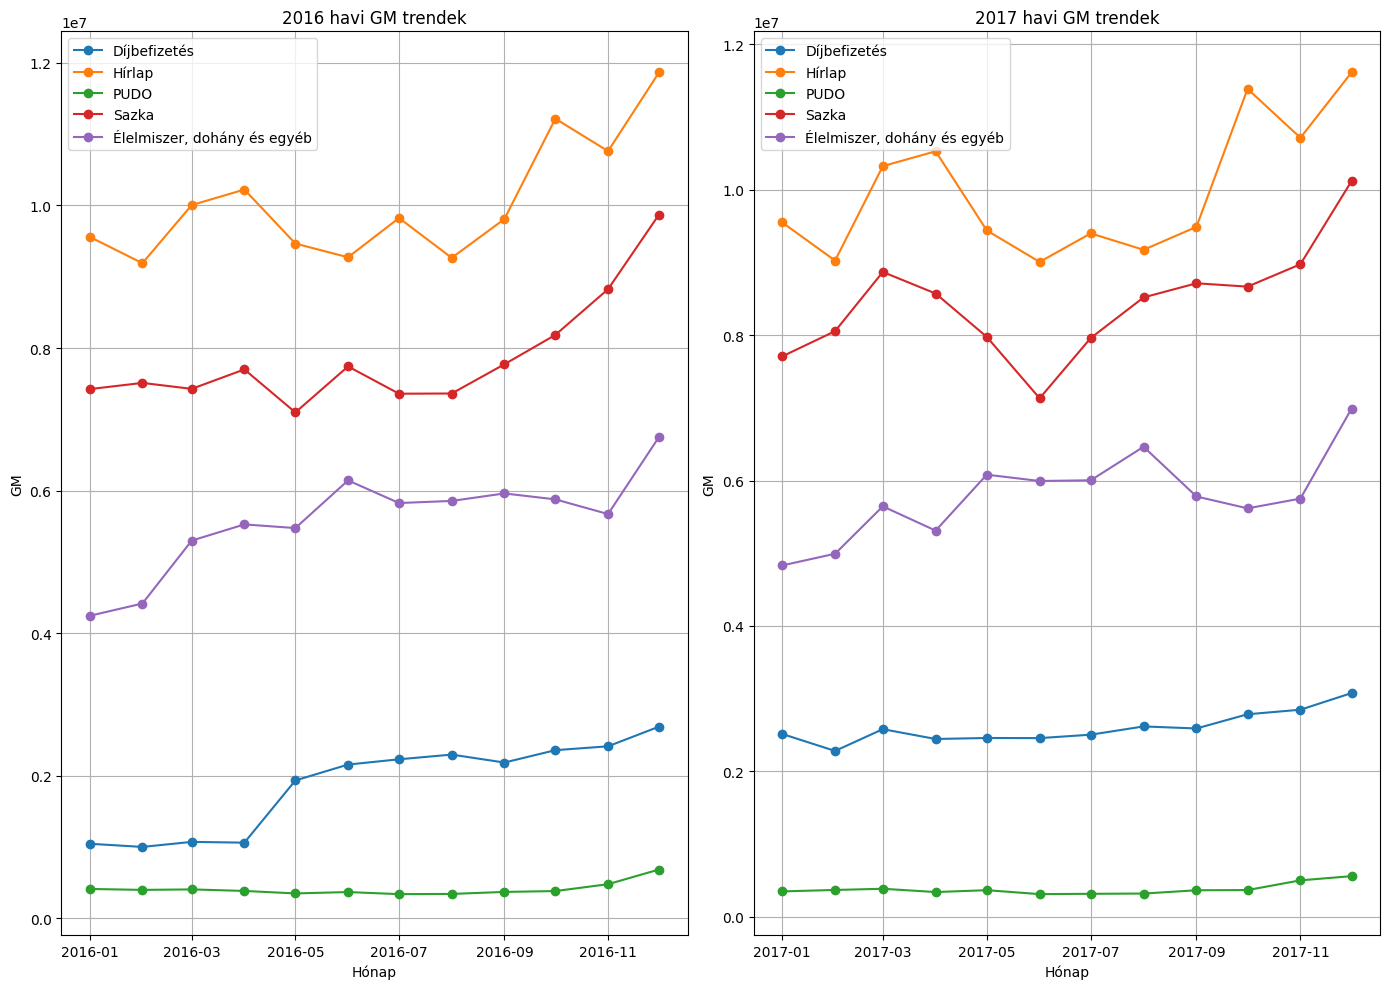

In [69]:
df_havi_gm_teljes['Dátum'] = pd.to_datetime(df_havi_gm_teljes['Év'].astype(str) + '-' + df_havi_gm_teljes['Hó'].astype(str))

ev_lista = sorted(df_havi_gm_teljes['Év'].unique())
kategoria_lista = df_havi_gm_teljes['Termékkategória'].unique()

fig, axs = plt.subplots(nrows=(len(ev_lista) + 1) // 2, ncols=2, figsize=(14, 10))
axs = axs.flatten()

for i, ev in enumerate(ev_lista):
    adat = df_havi_gm_teljes[df_havi_gm_teljes['Év'] == ev]
    ax = axs[i]
    for kat in kategoria_lista:
        kat_adat = adat[adat['Termékkategória'] == kat]
        ax.plot(kat_adat['Dátum'], kat_adat['GM'], label=kat, marker='o')
    ax.set_title(f"{ev} havi GM trendek")
    ax.set_xlabel('Hónap')
    ax.set_ylabel('GM')
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()


In [70]:
df_ev_termkat = (
    df_forgalom.groupby(['Év', 'Termékkategória'])['GM'].sum().reset_index()
)

df_ev_ossz_gm = (
    df_ev_termkat.groupby('Év')['GM']
    .sum()
    .reset_index()
    .rename(columns={'GM': 'Éves össz GM'})
)

df_ev_termkat = pd.merge(df_ev_termkat, df_ev_ossz_gm, on='Év', how='left')
df_ev_termkat['Részesedés (%)'] = 100 * df_ev_termkat['GM'] / df_ev_termkat['Éves össz GM']

df_ev_termkat[df_ev_termkat['Év'] == 2016]
df_ev_termkat[df_ev_termkat['Év'] == 2017]


,Év,Termékkategória,GM,Éves össz GM,Részesedés (%)
5,2017,Díjbefizetés,"31,136,738.52","326,047,862.57",9.55
6,2017,Hírlap,"119,669,434.47","326,047,862.57",36.70
7,2017,PUDO,"4,512,524.07","326,047,862.57",1.38
8,2017,Sazka,"101,272,120.74","326,047,862.57",31.06
9,2017,"Élelmiszer, dohány és egyéb","69,457,044.76","326,047,862.57",21.30


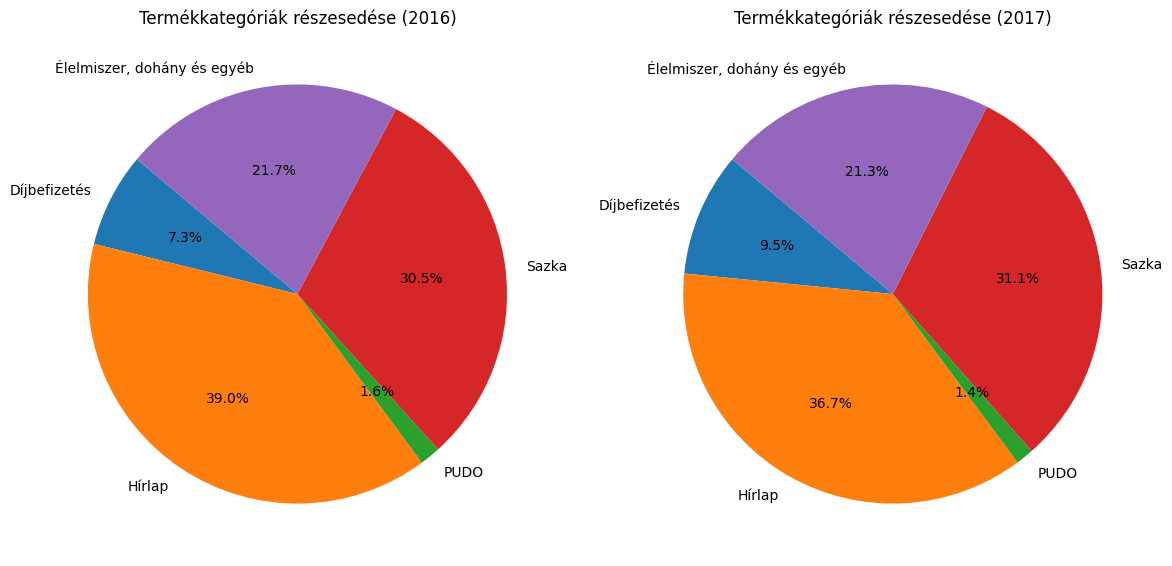

In [71]:
df_2016 = df_ev_termkat[df_ev_termkat['Év'] == 2016]
labels_2016 = df_2016['Termékkategória']
sizes_2016 = df_2016['GM']

df_2017 = df_ev_termkat[df_ev_termkat['Év'] == 2017]
labels_2017 = df_2017['Termékkategória']
sizes_2017 = df_2017['GM']

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].pie(sizes_2016, labels=labels_2016, autopct='%1.1f%%', startangle=140)
axes[0].set_title('Termékkategóriák részesedése (2016)')

axes[1].pie(sizes_2017, labels=labels_2017, autopct='%1.1f%%', startangle=140)
axes[1].set_title('Termékkategóriák részesedése (2017)')

plt.tight_layout()
plt.show()